In [391]:
from datetime import datetime, timedelta 
from scipy.signal import find_peaks
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import copy

import observatories
import reference
import data
import correlation
import download

In [290]:
download.downloadFullDay(year, month, day, [observatories.humain, observatories.swiss_landschlacht])

In [2]:
# Properties to control fontsizes in plots
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 16


plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [309]:
obs = [observatories.uni_graz,              # 0
       observatories.triest,                # 1
       observatories.swiss_landschlacht,    # 2
       observatories.oe3flb,                # 3
       observatories.alaska_haarp,          # 4
       observatories.alaska_cohoe,          # 5
       observatories.roswell,               # 6
       observatories.bir,                   # 7
       observatories.indonesia,             # 8
       observatories.assa,                  # 9
       observatories.swiss_muhen,           # 10
       observatories.swiss_hb9sct,          # 11
       observatories.egypt_alexandria,      # 12
       observatories.arecibo,               # 13
       observatories.greenland]


type2 = {"year":2017,"month":9,"day":6, "time":"12:04:00", "obs1":observatories.uni_graz, "obs2":observatories.triest}
type3 = {"year":2022,"month":1,"day":1, "time":"13:35:00", "obs1":observatories.uni_graz, "obs2":observatories.swiss_landschlacht}
type4 = {"year":2022,"month":2,"day":13, "time":"13:47:00", "time2":"13:37:00", "obs1":observatories.arecibo, "obs2":observatories.greenland}
ctm = {"year":2022,"month":1,"day":31, "time":"08:40:00", "time2":"08:25:00", "obs1":observatories.uni_graz, "obs2":observatories.assa}
typeu = {"year":2022,"month":1,"day":12, "time":"11:50:00", "obs1":observatories.swiss_landschlacht, "obs2":observatories.bir}
typev = {"year":2022,"month":1,"day":7, "time":"03:32:00", "time2":"03:20:00", "obs1":observatories.assa, "obs2":observatories.indonesia}
typev_ = {"year":2022,"month":1,"day":7, "time":"03:32:00", "time2":"03:20:00", "obs2":observatories.assa, "obs1":observatories.indonesia}
miss1 = {"year":2022,"month":1,"day":9, "time":"10:11:00", "obs2":observatories.uni_graz, "obs1":observatories.swiss_landschlacht}
miss1_ = {"year":2022,"month":1,"day":9, "time":"10:11:00", "obs1":observatories.uni_graz, "obs2":observatories.swiss_landschlacht}

run = miss1_

year = run['year']
month = run['month']
day = run['day']
time = run['time']
obs1 = run['obs1']
obs2 = run['obs2']


one spectrum 

In [320]:
dp1 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp2 = data.createFromTime(year, month, day, time, obs2, [45, 81])
cor1 = correlation.Correlation(dp1, dp2, day=day, _flatten=True, _bin_time=False, _bin_freq=False, _no_background=False,
                               _r_window=180)
cor1.calculatePeaks(_limit=0.6)
print(cor1.fileName())
print(cor1.peaks)

dp1 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp2 = data.createFromTime(year, month, day, time, obs2, [45, 81])
cor = correlation.Correlation(dp1, dp2, day=day, _flatten=True, _bin_time=True, _bin_freq=True, _no_background=True,
                              _r_window=45)
cor.calculatePeaks()
print(cor.fileName())
print(cor.peaks)

dp1 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp2 = data.createFromTime(year, month, day, time, obs2, [45, 81])
dp1.createSummedCurve([dp1.spectrum_data.freq_axis[-1], dp1.spectrum_data.freq_axis[0]])
dp2.createSummedCurve([dp2.spectrum_data.freq_axis[-1], dp2.spectrum_data.freq_axis[0]])
dp1.subtract_background()
dp2.subtract_background()
dp1.flattenSummedCurve()
dp2.flattenSummedCurve()

2022_1_9_AUSTRIA-UNIGRAZ_SWISS-Landschlacht_180_flatten_100.png
[['III', 10:02:53, 10:03:47, '0.6526'], [' II', 10:12:04, 10:14:37, '0.7391']]
2022_1_9_AUSTRIA-UNIGRAZ_SWISS-Landschlacht_45_nobg_binfreq_bintime_4_flatten_100.png
[[' II', 10:12:27, 10:14:39, '0.8083']]


2 spectrums

In [167]:
time2 = run['time2']

dp11= data.createFromTime(year, month, day, time2, obs1, [45, 81])
dp12 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp21= data.createFromTime(year, month, day, time2, obs2, [45, 81])
dp22 = data.createFromTime(year, month, day, time, obs2, [45, 81])
dp1 = dp11+dp12
dp2 = dp21+dp22

cor1 = correlation.Correlation(dp1, dp2, day=day, _flatten=True, _bin_time=False, _bin_freq=False, _no_background=False,
                               _r_window=180)
cor1.calculatePeaks(_limit=0.6)
print(cor1.fileName())
print(cor1.peaks)

dp11= data.createFromTime(year, month, day, time2, obs1, [45, 81])
dp12 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp21= data.createFromTime(year, month, day, time2, obs2, [45, 81])
dp22 = data.createFromTime(year, month, day, time, obs2, [45, 81])
dp1 = dp11+dp12
dp2 = dp21+dp22

cor = correlation.Correlation(dp1, dp2, day=day, _flatten=True, _bin_time=True, _bin_freq=True, _no_background=True,
                              _r_window=45)
cor.calculatePeaks(_limit=0.8)
print(cor.fileName())
print(cor.peaks)

dp11= data.createFromTime(year, month, day, time2, obs1, [45, 81])
dp12 = data.createFromTime(year, month, day, time, obs1, [45, 81])
dp21= data.createFromTime(year, month, day, time2, obs2, [45, 81])
dp22 = data.createFromTime(year, month, day, time, obs2, [45, 81])
dp1 = dp11+dp12
dp2 = dp21+dp22

dp1.createSummedCurve([dp1.spectrum_data.freq_axis[-1], dp1.spectrum_data.freq_axis[0]])
dp2.createSummedCurve([dp2.spectrum_data.freq_axis[-1], dp2.spectrum_data.freq_axis[0]])
dp1.subtract_background()
dp2.subtract_background()
dp1.flattenSummedCurve()
dp2.flattenSummedCurve()

2022_1_7_INDONESIA_Australia-ASSA_180_flatten_100.png
[['III', 03:25:04, 03:26:19, '0.9724'], ['III', 03:30:52, 03:31:54, '0.7544']]
2022_1_7_INDONESIA_Australia-ASSA_45_nobg_binfreq_bintime_4_flatten_100.png
[['III', 03:25:05, 03:25:59, '0.9557']]


plot everything

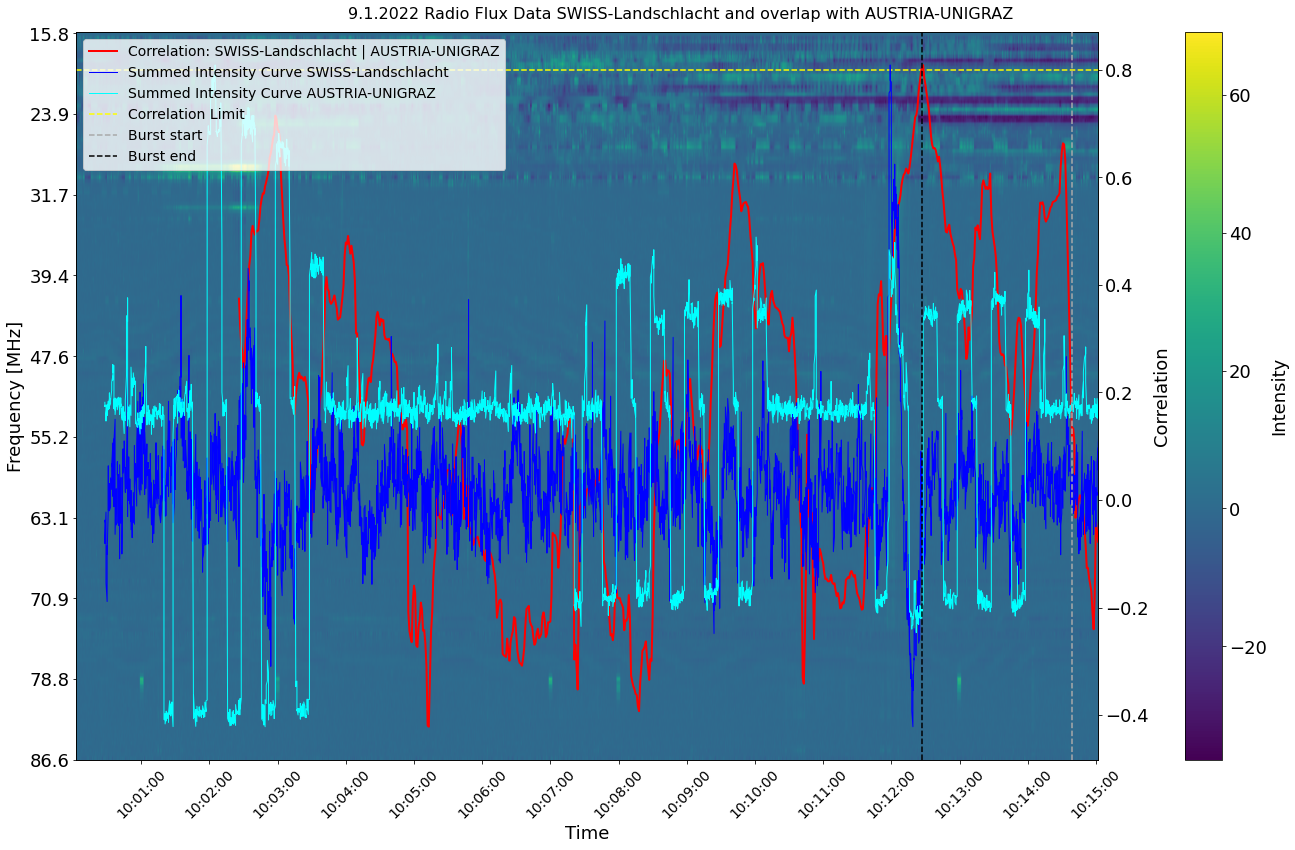

In [305]:
if len(cor.data_curve) < len(dp1.spectrum_data.time_axis[::4]):
    _time = dp1.spectrum_data.time_axis[::4][:len(cor.data_curve)]
else:
    _time = dp1.spectrum_data.time_axis[::4]
_time2 = dp1.spectrum_data.time_axis
_time_start = cor.time_start
_data = cor.data_curve
unscientific_shift = 0 # 45/4

t = np.arange(dp1.spectrum_data.start.strftime("%Y-%m-%dT%H:%M:%S.%z"),
              dp1.spectrum_data.end.strftime("%Y-%m-%dT%H:%M:%S.%z"), dtype='datetime64[s]').astype(datetime)
mt = mdates.date2num((t[0],t[-1]))

a=19
b=12
fig, ax = plt.subplots(figsize=(a,b))
fig.suptitle(f"{day}.{month}.{year} Radio Flux Data {dp1.observatory.name} and overlap with {cor.data_point_2.observatory.name}")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency [MHz]")
plt.imshow(dp1.spectrum_data.data, extent=[mt[0],mt[1], 0, int(900/a*b)], aspect='auto', origin='lower')
cbar = plt.colorbar(location='right', anchor=(.15,0.0))
cbar.set_label("Intensity")
ax.set_yticks([int(900/a*b/9) * i for i in range(0,10)],
              np.around(dp1.spectrum_data.freq_axis[::int(len(dp1.spectrum_data.freq_axis)/9)],1))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=60)

ax2 = plt.twinx(ax)
plot_limit = ax2.axhline(0.8, color="yellow", linestyle='--', label='Correlation Limit')
time_axis_plot = []
for i in _time:
    time_axis_plot.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
time_axis_plot = pd.to_datetime(time_axis_plot)
dataframe = pd.DataFrame()
dataframe['data'] = _data
dataframe = dataframe.set_index(time_axis_plot)
plot_cor = ax2.plot(dataframe, color="red", linewidth=2, label=f"Correlation: {cor.data_point_1.observatory.name} | {cor.data_point_2.observatory.name}")
ax2.set_ylabel("Correlation")

ax3 = plt.twinx(ax)
# ax3.spines["right"].set_position(("axes", 1.2))
# ax3.yaxis.get_offset_text().set_position((1.2,1))
# ax3.set_ylabel("data")
ax3.set_axis_off()
time_axis_plot2 = []
for i in _time2:
    time_axis_plot2.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
time_axis_plot2 = pd.to_datetime(time_axis_plot2)
dataframe2 = pd.DataFrame()
dataframe2['data'] = dp1.summedCurve
dataframe2 = dataframe2.set_index(time_axis_plot2)
plot_dat = ax3.plot(dataframe2, color="blue", linewidth=1, label=f"Summed Intensity Curve {dp1.observatory.name}")

ax4 = plt.twinx(ax)
ax4.set_axis_off()
time_axis_plot3 = []
dataframe3 = pd.DataFrame()
dataframe3['data'] = dp2.summedCurve
dataframe3 = dataframe3.set_index(time_axis_plot2)
plot_dat2 = ax4.plot(dataframe3, color="cyan", linewidth=1, label=f"Summed Intensity Curve {dp2.observatory.name}")

plots = plot_cor + plot_dat + plot_dat2
plots.append(plot_limit)

if cor.peaks:
    _peaks_start = []
    _peaks_end = []
    for i in cor.peaks:
        _peaks_start.append(mdates.date2num(i.time_start-timedelta(seconds=unscientific_shift)))
        _peaks_end.append(mdates.date2num(i.time_end-timedelta(seconds=unscientific_shift)))

    for i in _peaks_end:
        plot_b_start = plt.axvline(i,color="darkgrey", linestyle='--', label='Burst start')
    for i in _peaks_start:
        plot_b_end = plt.axvline(i,color="black", linestyle='--', label='Burst end')
    plots.extend([plot_b_start,plot_b_end])

labs = [l.get_label() for l in plots]
plt.legend(plots, labs, loc="upper left")
plt.tight_layout()
plt.show()

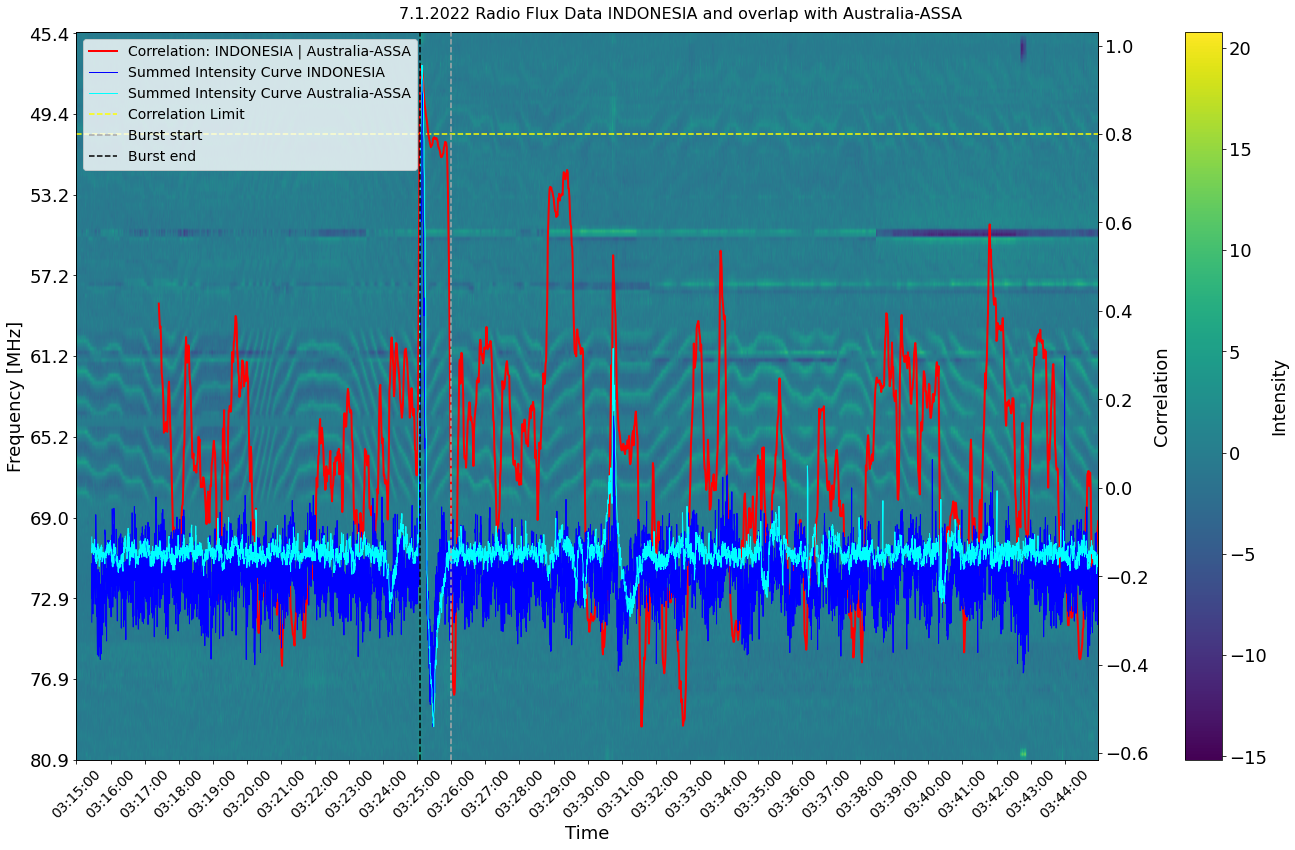

In [168]:
if len(cor.data_curve) < len(dp1.spectrum_data.time_axis[::4]):
    _time = dp1.spectrum_data.time_axis[::4][:len(cor.data_curve)]
else:
    _time = dp1.spectrum_data.time_axis[::4]
_time2 = dp1.spectrum_data.time_axis
_time_start = cor.time_start
_data = cor.data_curve
unscientific_shift = 0 # 45/4

t = np.arange(dp1.spectrum_data.start.strftime("%Y-%m-%dT%H:%M:%S.%z"),
              dp1.spectrum_data.end.strftime("%Y-%m-%dT%H:%M:%S.%z"), dtype='datetime64[s]').astype(datetime)
mt = mdates.date2num((t[0],t[-1]))

a=19
b=12
fig, ax = plt.subplots(figsize=(a,b))
fig.suptitle(f"{day}.{month}.{year} Radio Flux Data {dp1.observatory.name} and overlap with {cor.data_point_2.observatory.name}")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency [MHz]")
plt.imshow(dp1.spectrum_data.data, extent=[mt[0],mt[1], 0, int(900/a*b)], aspect='auto', origin='lower')
cbar = plt.colorbar(location='right', anchor=(.15,0.0))
cbar.set_label("Intensity")
ax.set_yticks([int(900/a*b/9) * i for i in range(0,10)],
              np.around(dp1.spectrum_data.freq_axis[::int(len(dp1.spectrum_data.freq_axis)/9)],1))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

ax2 = plt.twinx(ax)
plot_limit = ax2.axhline(0.8, color="yellow", linestyle='--', label='Correlation Limit')
time_axis_plot = []
for i in _time:
    time_axis_plot.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
time_axis_plot = pd.to_datetime(time_axis_plot)
dataframe = pd.DataFrame()
dataframe['data'] = _data
dataframe = dataframe.set_index(time_axis_plot)
plot_cor = ax2.plot(dataframe, color="red", linewidth=2, label=f"Correlation: {cor.data_point_1.observatory.name} | {cor.data_point_2.observatory.name}")
ax2.set_ylabel("Correlation")

ax3 = plt.twinx(ax)
# ax3.spines["right"].set_position(("axes", 1.2))
# ax3.yaxis.get_offset_text().set_position((1.2,1))
# ax3.set_ylabel("data")
ax3.set_axis_off()
time_axis_plot2 = []
for i in _time2:
    time_axis_plot2.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
time_axis_plot2 = pd.to_datetime(time_axis_plot2)
dataframe2 = pd.DataFrame()
dataframe2['data'] = dp1.summedCurve
dataframe2 = dataframe2.set_index(time_axis_plot2)
plot_dat = ax3.plot(dataframe2, color="blue", linewidth=1, label=f"Summed Intensity Curve {dp1.observatory.name}")

ax4 = plt.twinx(ax)
ax4.set_axis_off()
time_axis_plot3 = []
dataframe3 = pd.DataFrame()
dataframe3['data'] = dp2.summedCurve
dataframe3 = dataframe3.set_index(time_axis_plot2)
plot_dat2 = ax4.plot(dataframe3, color="cyan", linewidth=1, label=f"Summed Intensity Curve {dp2.observatory.name}")

plots = plot_cor + plot_dat + plot_dat2
plots.append(plot_limit)

if cor.peaks:
    _peaks_start = []
    _peaks_end = []
    for i in cor.peaks:
        _peaks_start.append(mdates.date2num(i.time_start-timedelta(seconds=unscientific_shift)))
        _peaks_end.append(mdates.date2num(i.time_end-timedelta(seconds=unscientific_shift)))

    for i in _peaks_end:
        plot_b_start = plt.axvline(i,color="darkgrey", linestyle='--', label='Burst start')
    for i in _peaks_start:
        plot_b_end = plt.axvline(i,color="black", linestyle='--', label='Burst end')
    plots.extend([plot_b_start,plot_b_end])

labs = [l.get_label() for l in plots]
plt.legend(plots, labs, loc="upper left")
plt.tight_layout()
plt.show()

plot only the image

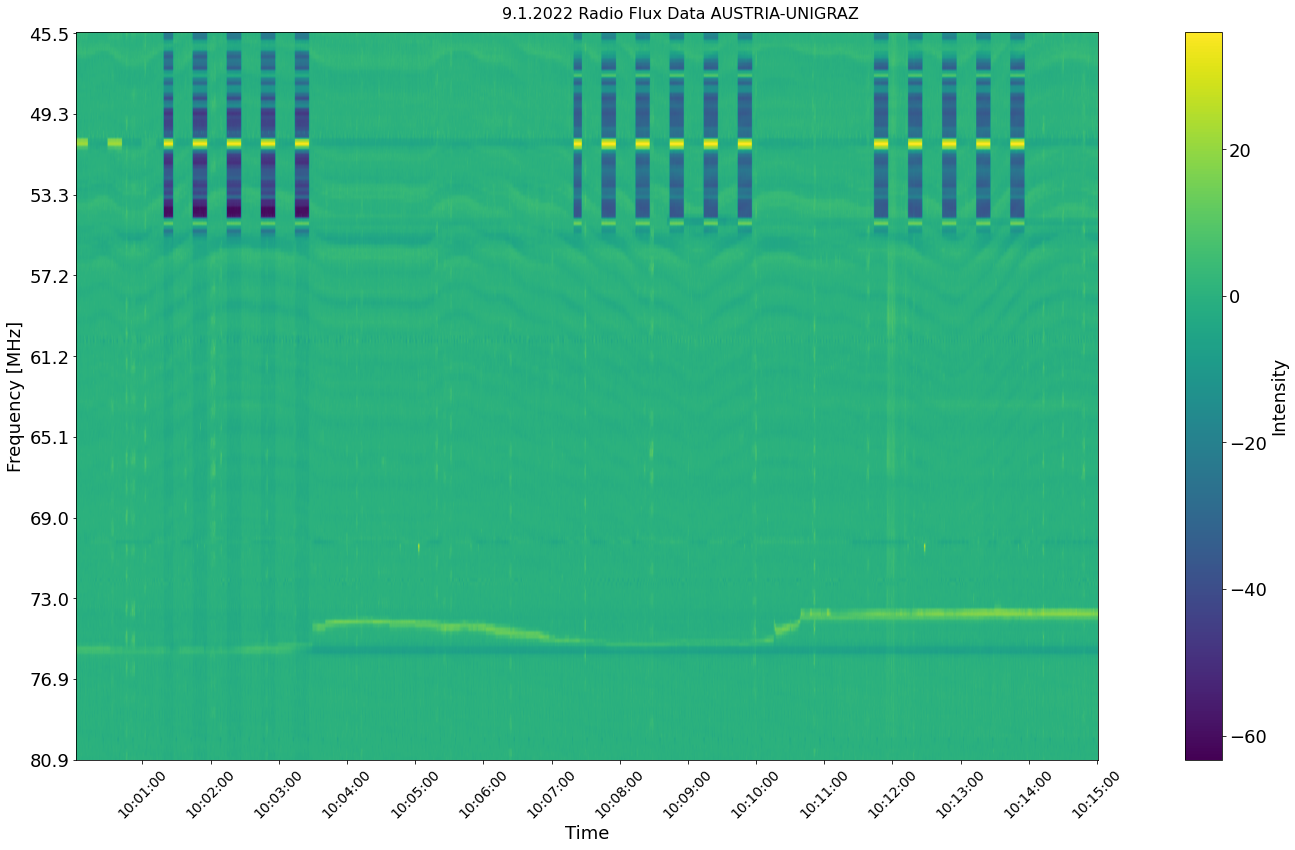

In [460]:
if len(cor.data_curve) < len(dp1.spectrum_data.time_axis[::4]):
    _time = dp1.spectrum_data.time_axis[::4][:len(cor.data_curve)]
else:
    _time = dp1.spectrum_data.time_axis[::4]
_time2 = dp1.spectrum_data.time_axis
_time_start = cor.time_start
_data = cor.data_curve
unscientific_shift = 0 # 45/4

t = np.arange(dp1.spectrum_data.start.strftime("%Y-%m-%dT%H:%M:%S.%z"),
              dp1.spectrum_data.end.strftime("%Y-%m-%dT%H:%M:%S.%z"), dtype='datetime64[s]').astype(datetime)
mt = mdates.date2num((t[0],t[-1]))

a=19
b=12
fig, ax = plt.subplots(figsize=(a,b))
fig.suptitle(f"{day}.{month}.{year} Radio Flux Data {dp1.observatory.name}")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency [MHz]")
plt.imshow(dp1.spectrum_data.data, extent=[mt[0],mt[1], 0, int(900/a*b)], aspect='auto', origin='lower')
cbar = plt.colorbar(location='right', anchor=(.15,0.0))
cbar.set_label("Intensity")
ax.set_yticks([int(900/a*b/9) * i for i in range(0,10)],
              np.around(dp1.spectrum_data.freq_axis[::int(len(dp1.spectrum_data.freq_axis)/9)],1))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

plots = plot_cor + plot_dat + plot_dat2
plots.append(plot_limit)

plt.tight_layout()
plt.show()

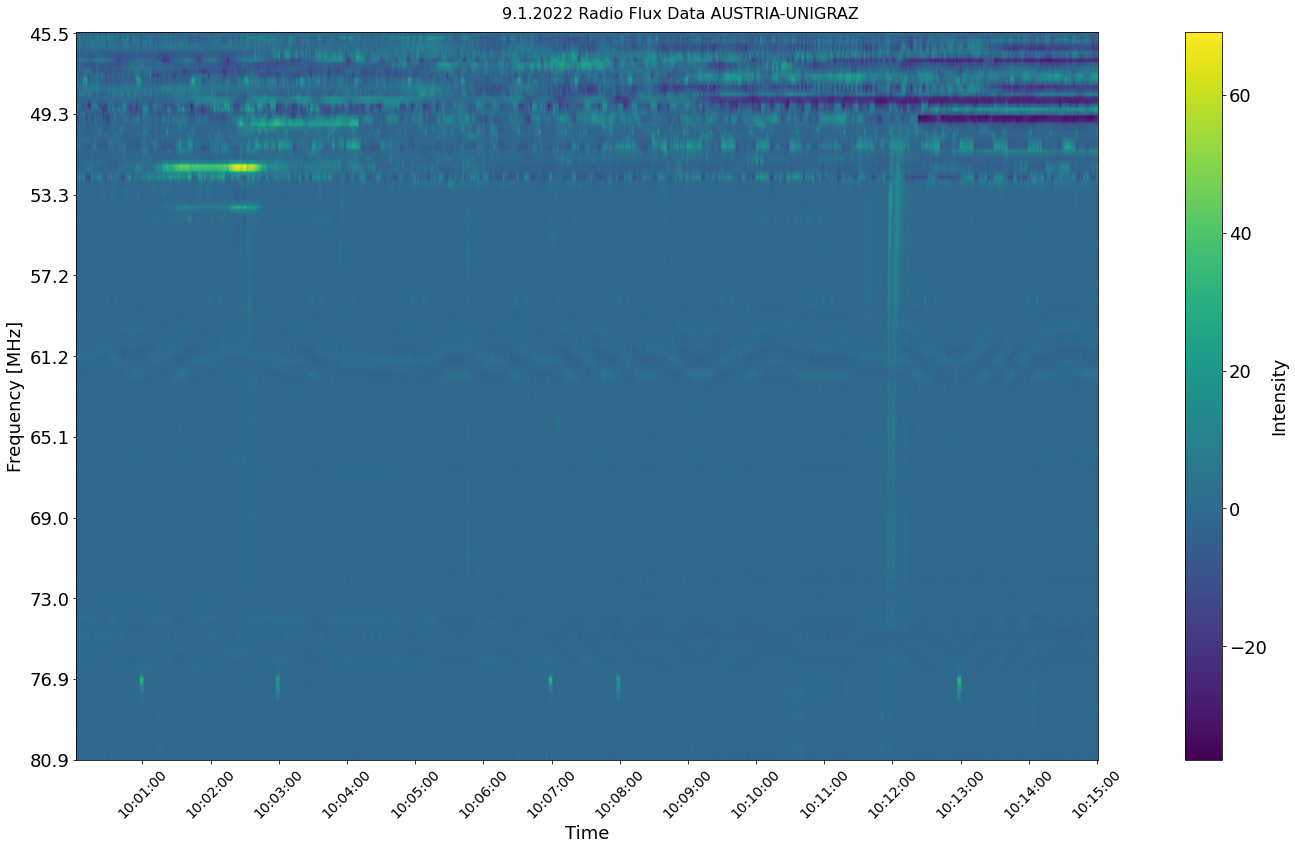

In [465]:
if len(cor.data_curve) < len(dp1.spectrum_data.time_axis[::4]):
    _time = dp1.spectrum_data.time_axis[::4][:len(cor.data_curve)]
else:
    _time = dp1.spectrum_data.time_axis[::4]
_time2 = dp1.spectrum_data.time_axis
_time_start = cor.time_start
_data = cor.data_curve
unscientific_shift = 0 # 45/4

t = np.arange(dp1.spectrum_data.start.strftime("%Y-%m-%dT%H:%M:%S.%z"),
              dp1.spectrum_data.end.strftime("%Y-%m-%dT%H:%M:%S.%z"), dtype='datetime64[s]').astype(datetime)
mt = mdates.date2num((t[0],t[-1]))

a=19
b=12
fig, ax = plt.subplots(figsize=(a,b))
fig.suptitle(f"{day}.{month}.{year} Radio Flux Data {dp1.observatory.name}")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency [MHz]")
plt.imshow(dp2.spectrum_data.data, extent=[mt[0],mt[1], 0, int(900/a*b)], aspect='auto', origin='lower')
cbar = plt.colorbar(location='right', anchor=(.15,0.0))
cbar.set_label("Intensity")
ax.set_yticks([int(900/a*b/9) * i for i in range(0,10)],
              np.around(dp1.spectrum_data.freq_axis[::int(len(dp1.spectrum_data.freq_axis)/9)],1))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

plots = plot_cor + plot_dat + plot_dat2
plots.append(plot_limit)

plt.tight_layout()
plt.show()

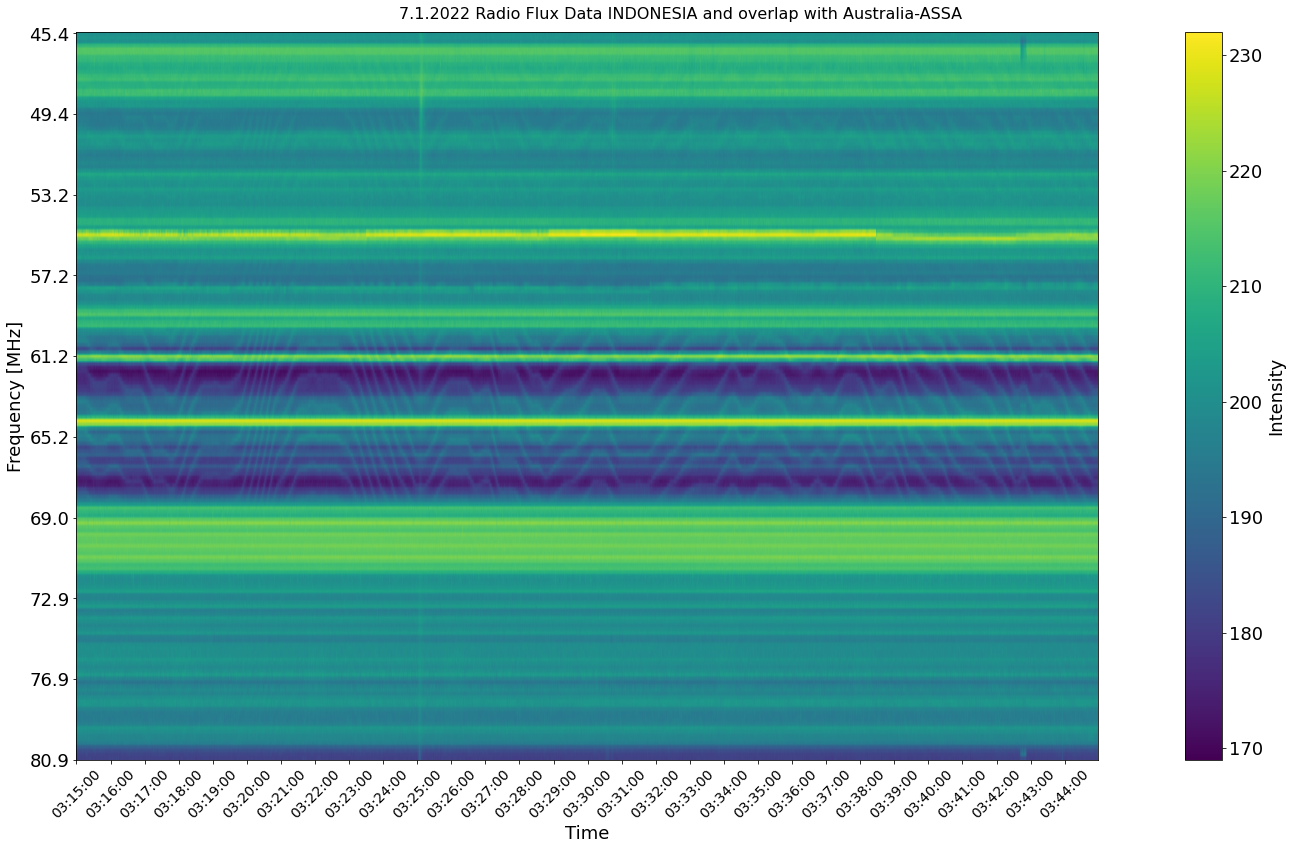

In [149]:
if len(cor.data_curve) < len(dp1.spectrum_data.time_axis[::4]):
    _time = dp1.spectrum_data.time_axis[::4][:len(cor.data_curve)]
else:
    _time = dp1.spectrum_data.time_axis[::4]
_time2 = dp1.spectrum_data.time_axis
_time_start = cor.time_start
_data = cor.data_curve
unscientific_shift = 0 # 45/4

t = np.arange(dp1.spectrum_data.start.strftime("%Y-%m-%dT%H:%M:%S.%z"),
              dp1.spectrum_data.end.strftime("%Y-%m-%dT%H:%M:%S.%z"), dtype='datetime64[s]').astype(datetime)
mt = mdates.date2num((t[0],t[-1]))

a=19
b=12
fig, ax = plt.subplots(figsize=(a,b))
fig.suptitle(f"{day}.{month}.{year} Radio Flux Data {dp1.observatory.name} and overlap with {cor.data_point_2.observatory.name}")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency [MHz]")
plt.imshow(dp1.spectrum_data.data, extent=[mt[0],mt[1], 0, int(900/a*b)], aspect='auto', origin='lower')
cbar = plt.colorbar(location='right', anchor=(.15,0.0))
cbar.set_label("Intensity")
ax.set_yticks([int(900/a*b/9) * i for i in range(0,10)],
              np.around(dp1.spectrum_data.freq_axis[::int(len(dp1.spectrum_data.freq_axis)/9)],1))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# ax2 = plt.twinx(ax)
# plot_limit = ax2.axhline(0.8, color="yellow", linestyle='--', label='Correlation Limit')
# time_axis_plot = []
# for i in _time:
#     time_axis_plot.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
# time_axis_plot = pd.to_datetime(time_axis_plot)
# dataframe = pd.DataFrame()
# dataframe['data'] = _data
# dataframe = dataframe.set_index(time_axis_plot)
# plot_cor = ax2.plot(dataframe, color="red", linewidth=2, label=f"Correlation: {cor.data_point_1.observatory.name} | {cor.data_point_2.observatory.name}")
# ax2.set_ylabel("Correlation")

# ax3 = plt.twinx(ax)
# # ax3.spines["right"].set_position(("axes", 1.2))
# # ax3.yaxis.get_offset_text().set_position((1.2,1))
# # ax3.set_ylabel("data")
# ax3.set_axis_off()
# time_axis_plot2 = []
# for i in _time2:
#     time_axis_plot2.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
# time_axis_plot2 = pd.to_datetime(time_axis_plot2)
# dataframe2 = pd.DataFrame()
# dataframe2['data'] = dp1.summedCurve
# dataframe2 = dataframe2.set_index(time_axis_plot2)
# plot_dat = ax3.plot(dataframe2, color="blue", linewidth=1, label=f"Summed Intensity Curve {dp1.observatory.name}")
# 
# ax4 = plt.twinx(ax)
# ax4.set_axis_off()
# time_axis_plot3 = []
# dataframe3 = pd.DataFrame()
# dataframe3['data'] = dp2.summedCurve
# dataframe3 = dataframe3.set_index(time_axis_plot2)
# plot_dat2 = ax4.plot(dataframe3, color="cyan", linewidth=1, label=f"Summed Intensity Curve {dp2.observatory.name}")

plots = plot_cor + plot_dat + plot_dat2
plots.append(plot_limit)

# if cor.peaks:
#     _peaks_start = []
#     _peaks_end = []
#     for i in cor.peaks:
#         _peaks_start.append(mdates.date2num(i.time_start-timedelta(seconds=unscientific_shift)))
#         _peaks_end.append(mdates.date2num(i.time_end-timedelta(seconds=unscientific_shift)))
# 
#     for i in _peaks_end:
#         plot_b_start = plt.axvline(i,color="darkgrey", linestyle='--', label='Burst start')
#     for i in _peaks_start:
#         plot_b_end = plt.axvline(i,color="black", linestyle='--', label='Burst end')
#     plots.extend([plot_b_start,plot_b_end])

# labs = [l.get_label() for l in plots]
# plt.legend(plots, labs, loc="upper left")
plt.tight_layout()
plt.show()

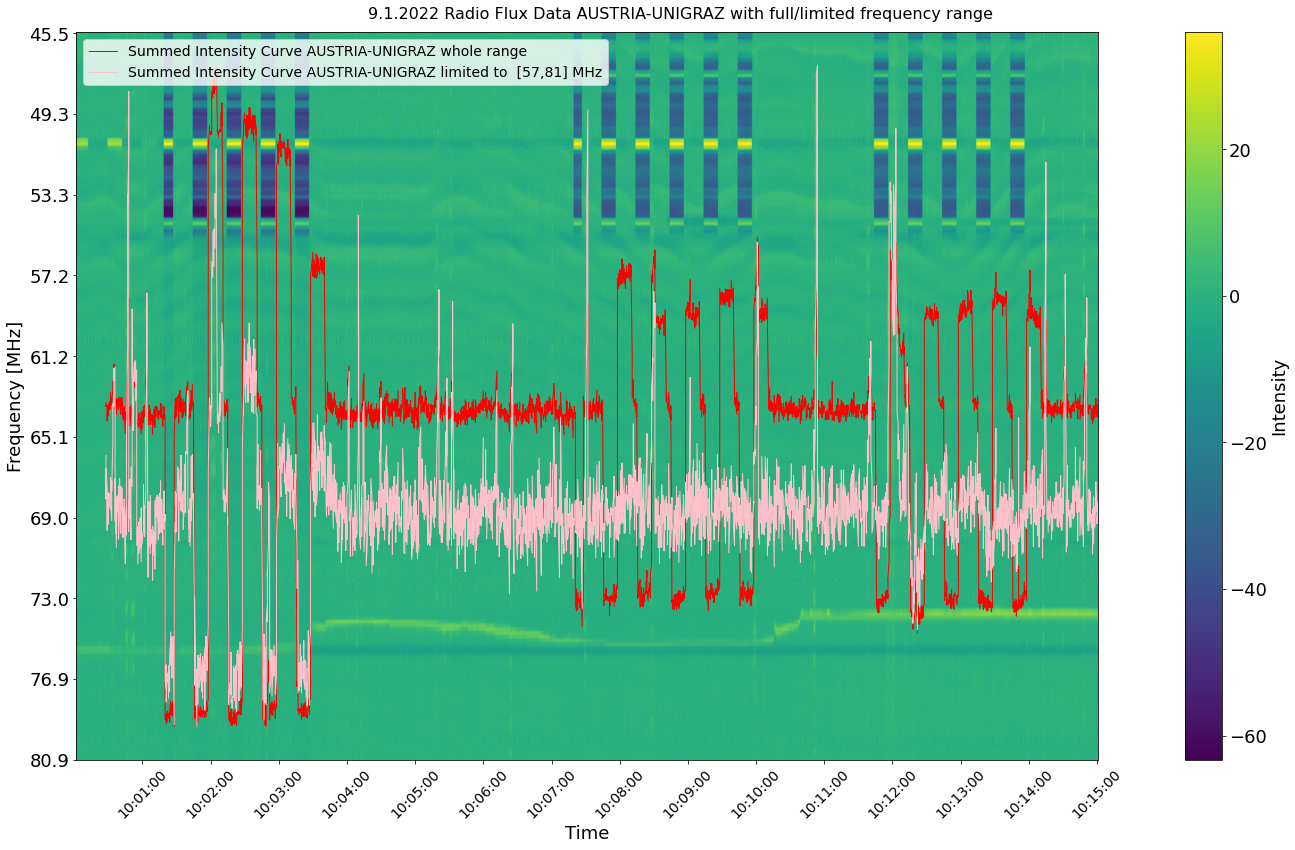

In [452]:
dpf = data.createFromTime(year, month, day, time, obs1, [45, 81])
dpf.subtract_background()
dpf.createSummedCurve([57,80])
dpf.flattenSummedCurve()

if len(cor.data_curve) < len(dp1.spectrum_data.time_axis[::4]):
    _time = dp1.spectrum_data.time_axis[::4][:len(cor.data_curve)]
else:
    _time = dp1.spectrum_data.time_axis[::4]
_time2 = dp1.spectrum_data.time_axis
_time_start = cor.time_start
_data = cor.data_curve
unscientific_shift = 0 # 45/4

t = np.arange(dp1.spectrum_data.start.strftime("%Y-%m-%dT%H:%M:%S.%z"),
              dp1.spectrum_data.end.strftime("%Y-%m-%dT%H:%M:%S.%z"), dtype='datetime64[s]').astype(datetime)
mt = mdates.date2num((t[0],t[-1]))

a=19
b=12
fig, ax = plt.subplots(figsize=(a,b))
fig.suptitle(f"{day}.{month}.{year} Radio Flux Data {dp1.observatory.name} with full/limited frequency range")
ax.set_xlabel("Time")
ax.set_ylabel("Frequency [MHz]")
plt.imshow(dp1.spectrum_data.data, extent=[mt[0],mt[1], 0, int(900/a*b)], aspect='auto', origin='lower')
cbar = plt.colorbar(location='right', anchor=(.15,0.0))
cbar.set_label("Intensity")
ax.set_yticks([int(900/a*b/9) * i for i in range(0,10)],
              np.around(dp1.spectrum_data.freq_axis[::int(len(dp1.spectrum_data.freq_axis)/9)],1))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

ax3 = plt.twinx(ax)

ax3.set_axis_off()
time_axis_plot2 = []
for i in _time2:
    time_axis_plot2.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
time_axis_plot2 = pd.to_datetime(time_axis_plot2)
dataframe2 = pd.DataFrame()
dataframe2['data'] = dp1.summedCurve
dataframe2 = dataframe2.set_index(time_axis_plot2)
plot_dat = ax3.plot(dataframe2, color="red", linewidth=1, label=f"Summed Intensity Curve {dp1.observatory.name} whole range")

ax4 = plt.twinx(ax)
ax4.set_axis_off()
time_axis_plot3 = []
dataframe3 = pd.DataFrame()
dataframe3['data'] = dpf.summedCurve
dataframe3 = dataframe3.set_index(time_axis_plot2)
plot_dat2 = ax4.plot(dataframe3, color="pink", linewidth=1, label=f"Summed Intensity Curve {dp1.observatory.name} limited to  [57,81] MHz")

plots = plot_dat + plot_dat2

labs = [l.get_label() for l in plots]
plt.legend(plots, labs, loc="upper left")
plt.tight_layout()
plt.show()

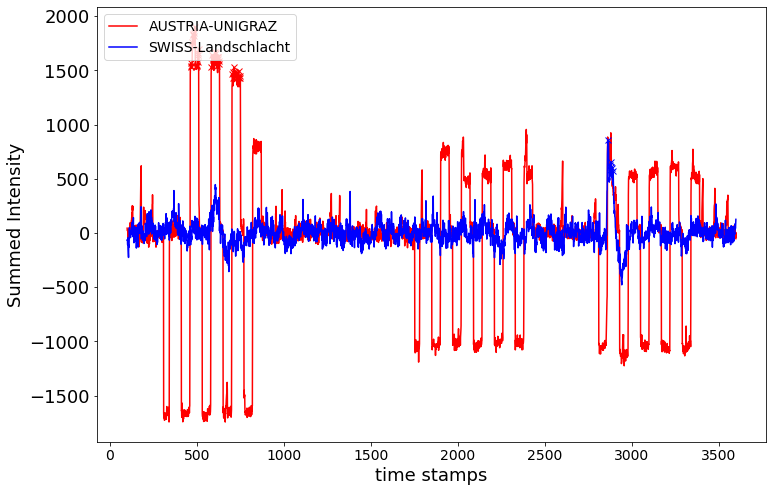

[]


In [462]:
plt.figure(figsize=(12,8))
plt.xlabel("time stamps")
plt.ylabel("Summed Intensity")
x1 = np.array(dp1.summedCurve)
lim1 = 2 * np.nanstd(x1)
scipy_peaks1 = find_peaks(x1, height=lim1)[0]
plt.plot(x1, color="red", label=f"{dp1.observatory}")
plt.plot(scipy_peaks1, x1[scipy_peaks1], "x", color="red")

plt.xlabel("time stamps")
plt.ylabel("Summed Intensity")
x2 = np.array(dp2.summedCurve)
lim2 = 5 * np.nanstd(x2)
scipy_peaks2 = find_peaks(x2, height=lim2)[0]
plt.plot(x2, color="blue", label=f"{dp2.observatory}")
plt.plot(scipy_peaks2, x2[scipy_peaks2], "x", color="blue")

plt.legend(loc="upper left")
plt.show()

new = [scipy_peaks1[0]]
for kk in scipy_peaks1:
    if all(np.around(kk - new,-2)):
        new.append(kk)

new2 = [scipy_peaks2[0]]
for kk in scipy_peaks2:
    if all(np.around(kk - new2,-2)):
        new2.append(kk)


new3 = []
for kk in new:
    if any(np.around(kk - new2,-2) == False):
        new3.append(kk)
print(new3)
for i in new3:
    print(datetime.fromtimestamp(_time_start + i/4).strftime("%Y %m %d %H:%M:%S"))

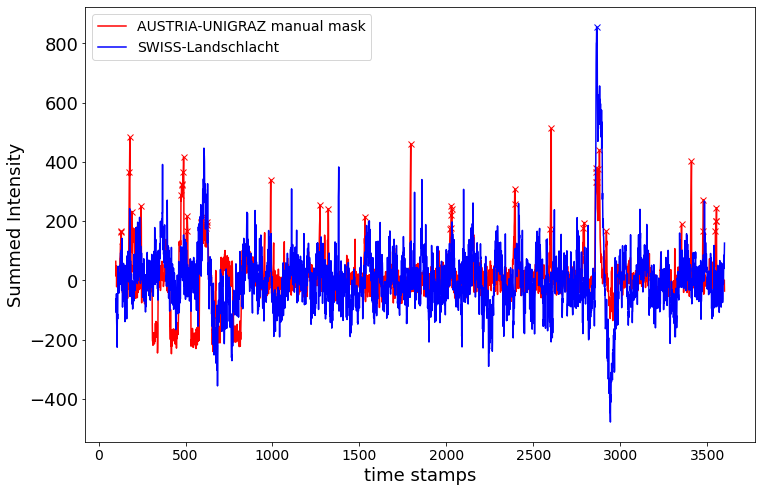

[2858]
2022 01 09 10:11:57


In [463]:
plt.figure(figsize=(12,8))
plt.xlabel("time stamps")
plt.ylabel("Summed Intensity")
x1 = np.array(dpf.summedCurve)
x2 = np.array(dp2.summedCurve)
lim1 = 2 * np.nanstd(x1)
scipy_peaks1 = find_peaks(x1, height=lim1)[0]
plt.plot(x1, color="red", label=f"{dpf.observatory} manual mask")
plt.plot(scipy_peaks1, x1[scipy_peaks1], "x", color="red")

plt.xlabel("time stamps")
plt.ylabel("Summed Intensity")

lim2 = 6 * np.nanstd(x2)
scipy_peaks2 = find_peaks(x2, height=lim2)[0]
plt.plot(x2, color="blue", label=f"{dp2.observatory}")
plt.plot(scipy_peaks2, x2[scipy_peaks2], "x", color="blue")

plt.legend(loc="upper left")
plt.show()

new = [scipy_peaks1[0]]
for kk in scipy_peaks1:
    if all(np.around(kk - new,-2)):
        new.append(kk)

new2 = [scipy_peaks2[0]]
for kk in scipy_peaks2:
    if all(np.around(kk - new2,-2)):
        new2.append(kk)


new3 = []
for kk in new:
    if any(np.around(kk - new2,-2) == False):
        new3.append(kk)
print(new3)
for i in new3:
    print(datetime.fromtimestamp(_time_start + i/4).strftime("%Y %m %d %H:%M:%S"))

creating a mask which frequencies are 'useless' [>2stddev]

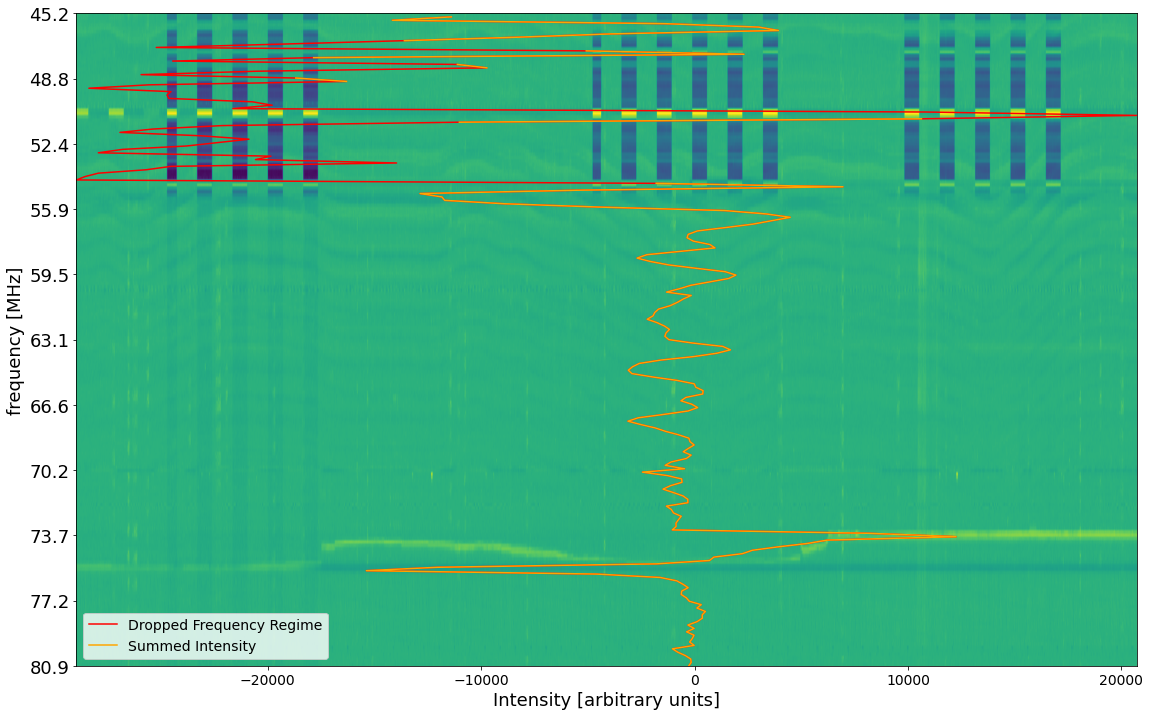

In [437]:
dada = dp1.spectrum_data.data

summed = np.array([np.nansum(dada[f]) for f in range(len(dada))])

summed_max = np.nanmax(summed)
summed_min = np.nanmin(summed)
summed_lim = 2 * np.nanstd(summed)
mask = [abs(i) > summed_lim for i in summed]
summed_ = copy.copy(summed)
summed_[mask] = np.nan

fig, ax = plt.subplots(figsize=(a,b))
curve, = plt.plot(summed)
curve_, = plt.plot(summed_)

ax.set_xticks([len(dada) * i/10 for i in range(0,11)],
              np.around(dp1.spectrum_data.freq_axis[::int(len(dp1.spectrum_data.freq_axis)/10)],1))
newx = curve.get_xdata()
newy = curve.get_ydata()
newx_ = curve_.get_xdata()
newy_ = curve_.get_ydata()
plt.close()

fig, ax = plt.subplots(figsize=(a,b))
plt.imshow(dp1.spectrum_data.data, extent=[summed_min, summed_max, 0, 192], aspect='auto', origin='lower')
ax.set_ylim([45,81])
ax.set_xlim([np.nanmin(summed),np.nanmax(summed)])
ax.set_yticks([len(dada) * i/10 for i in range(0,11)],
              np.around(dp1.spectrum_data.freq_axis[::int(len(dp1.spectrum_data.freq_axis)/10)],1))
plt.xlabel("Intensity [arbitrary units]")
plt.ylabel("frequency [MHz]")

curve2, = ax.plot(summed, color='red', label="Dropped Frequency Regime")
curve2.set_xdata(newy)
curve2.set_ydata(newx)

curve2_, = ax.plot(summed_, color='orange', label="Summed Intensity")
curve2_.set_xdata(newy_)
curve2_.set_ydata(newx_)

ax.legend(loc="lower left")
plt.show()

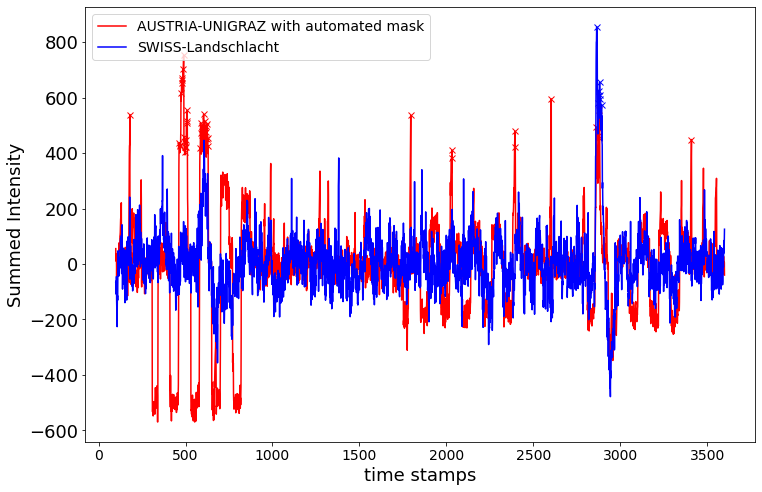

[2862]
2022 01 09 10:11:58


In [464]:
plt.figure(figsize=(12,8))
plt.xlabel("time stamps")
plt.ylabel("Summed Intensity")
testpoint = copy.deepcopy(dp1)
testpoint.spectrum_data.data[mask,:] = np.nan
testpoint.createSummedCurve([45,81])
testpoint.flattenSummedCurve()

x1 = np.array(testpoint.summedCurve)
x2 = np.array(dp2.summedCurve)
lim1 = 2 * np.nanstd(x1)
scipy_peaks1 = find_peaks(x1, height=lim1)[0]
plt.plot(x1, color="red", label=f"{testpoint.observatory} with automated mask")
plt.plot(scipy_peaks1, x1[scipy_peaks1], "x", color="red")

plt.xlabel("time stamps")
plt.ylabel("Summed Intensity")

lim2 = 5 * np.nanstd(x2)
scipy_peaks2 = find_peaks(x2, height=lim2)[0]
plt.plot(x2, color="blue", label=f"{dp2.observatory}")
plt.plot(scipy_peaks2, x2[scipy_peaks2], "x", color="blue")

plt.legend(loc="upper left")
plt.show()

new = [scipy_peaks1[0]]
for kk in scipy_peaks1:
    if all(np.around(kk - new,-2)):
        new.append(kk)

new2 = [scipy_peaks2[0]]
for kk in scipy_peaks2:
    if all(np.around(kk - new2,-2)):
        new2.append(kk)


new3 = []
for kk in new:
    if any(np.around(kk - new2,-2) == False):
        new3.append(kk)
print(new3)
for i in new3:
    print(datetime.fromtimestamp(_time_start + i/4).strftime("%Y %m %d %H:%M:%S"))